<a href="https://colab.research.google.com/github/bruna-calistrate/deliv2-dex03-wallmart/blob/main/D3G01_Mini_Projeto_2_Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Projeto - Walmart

## DEx 3 Grupo 01: André Alves, Bruna Calistrate, Filipe Oliveira, Gabriel Shinzato, Mário Vasconcelos, Maurício Jornada Bastos, Paulo Vitor de Souza Santos

## Entendimento do negócio

**Walmart, Inc.**, é uma multinacional estadunidense de lojas de departamento. 

A companhia foi fundada por Sam Walton em 1962, incorporada em 31 de outubro de 1969 e feita capital aberto na New York Stock Exchange, em 1972. No ano de 2021, obteve um lucro de US$ 13.51 bilhões.

Sendo **uma das principais lojas de varejo do mundo**, o os dados contemplam as vendas semanais de 45 lojas espalhadas pelos Estados Unidos. O Walmart realiza **vários eventos promocionais de descontos ao longo do ano**. Essas remarcações precedem feriados importantes, os quatro maiores de todos, que são: Super Bowl, Dia do Trabalho, Dia de Ação de Graças e Natal.

As semanas que incluem esses feriados têm um peso maior.

### Questão de negócio

**Qual seria a melhor loja para expandir o seu tamanho?**

#### Meta

Determinar a melhor loja para investir na expansão.

#### Como

A partir de métricas encontradas nos dados fornecidos de vendas semanais das 45 lojas entre 05/02/2010 até 01/11/2012.

## Entendimento dos dados

### Carregamento de bibliotecas

Bibliotexas importantes para auxiliar no processamento e visualização dos dados.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import date

### Importação dos dados

Para determinar a melhor loja para investimento, foi utilizado o banco de dados com as vendas semanais das 45 lojas entre fevereiro de 2010 e novembro de 2012.

In [2]:
df_wm = pd.read_csv('https://raw.githubusercontent.com/bruna-calistrate/deliv2-dex03-wallmart/main/Walmart.csv')

In [11]:
pd.set_option('float_format', '{:.2f}'.format)

### Análise exploratória dos dados

Conferir o tamanho da base de dados, descrever os valores numéricos, verificar se existem valores nulos e visualizar os dados.

In [12]:
df_wm.shape

(6435, 8)

In [13]:
df_wm.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,0.07,60.66,3.36,171.58,8.00
std,12.99,564366.62,0.26,18.44,0.46,39.36,1.88
min,1.00,209986.25,0.00,-2.06,2.47,126.06,3.88
25%,12.00,553350.10,0.00,47.46,2.93,131.74,6.89
50%,23.00,960746.04,0.00,62.67,3.44,182.62,7.87
75%,34.00,1420158.66,0.00,74.94,3.73,212.74,8.62
max,45.00,3818686.45,1.00,100.14,4.47,227.23,14.31


In [14]:
df_wm.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [15]:
df_wm.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.32,8.11
4,1,05-03-2010,1554806.68,0,46.50,2.62,211.35,8.11


In [16]:
df_wm.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,4.00,192.01,8.68
6431,45,05-10-2012,733455.07,0,64.89,3.98,192.17,8.67
6432,45,12-10-2012,734464.36,0,54.47,4.00,192.33,8.67
6433,45,19-10-2012,718125.53,0,56.47,3.97,192.33,8.67
6434,45,26-10-2012,760281.43,0,58.85,3.88,192.31,8.67


In [17]:
df_wm.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

A partir da análise inicial dos dados, é possível verificar que existem 6435 registros de vendas semanais descritos em 8 colunas e não existem valores nulos. Analisando os valores, podemos concluir:


*   A média global de vendas semanais é de USD 1,047 milhões, sendo o valor mínimo US$ 210 mil e o máximo USD 3,819 milhões.
*   A média do preço de combustível foi de USD 3,36, variando entre USD 2,47 e USD 4,47.
* A taxa de desemprego média no período é de 8,00%, variando entre 3,88% e 14,31%.
* A coluna com as datas está como objeto e deverá ser corrigida.
* A coluna de temperatura está em °F e deverá ser convertida para °C.



### Tratamento inicial dos dados

Traduzir as colunas para melhor entendimento dos dados.

In [18]:
df_wm.rename(columns={'Store': 'Loja', 'Date': 'Data', 'Weekly_Sales': 'VendaSemanal', 
                      'Holiday_Flag': 'Feriado', 'Temperature': 'Temperatura', 
                      'Fuel_Price' : 'PrecoComb', 'CPI': 'IPC', 'Unemployment':'Desemprego'}, inplace=True)

Converter a coluna de Data para o formato datetime e convertendo graus Fahrenheit para grais Celcius

In [19]:
df_wm['Data'] = pd.to_datetime(df_wm['Data'], dayfirst=True)

In [21]:
df_wm['Temperatura'] = df_wm.apply(lambda x: (x['Temperatura']-32)*5/9,axis=1)

In [20]:
df_wm.dtypes

Loja                     int64
Data            datetime64[ns]
VendaSemanal           float64
Feriado                  int64
Temperatura            float64
PrecoComb              float64
IPC                    float64
Desemprego             float64
dtype: object

Criar uma nova coluna descrevendo qual o feriado da semana

In [28]:
df_wm.loc[df_wm['Data'] == '2010-02-12', 'Evento'] = 'Super Bowl'
df_wm.loc[df_wm['Data'] == '2011-02-11', 'Evento'] = 'Super Bowl'
df_wm.loc[df_wm['Data'] == '2012-02-10', 'Evento'] = 'Super Bowl'
df_wm.loc[df_wm['Data'] == '2010-12-31', 'Evento'] = 'Natal'
df_wm.loc[df_wm['Data'] == '2011-12-30', 'Evento'] = 'Natal'
df_wm.loc[df_wm['Data'] == '2012-12-28', 'Evento'] = 'Natal'
df_wm.loc[df_wm['Data'] == '2010-11-26', 'Evento'] = 'Ação de Graças'
df_wm.loc[df_wm['Data'] == '2011-11-25', 'Evento'] = 'Ação de Graças'
df_wm.loc[df_wm['Data'] == '2012-11-23', 'Evento'] = 'Ação de Graças'
df_wm.loc[df_wm['Data'] == '2010-09-10', 'Evento'] = 'Dia do Trabalho'
df_wm.loc[df_wm['Data'] == '2011-09-09', 'Evento'] = 'Dia do Trabalho'
df_wm.loc[df_wm['Data'] == '2012-09-07', 'Evento'] = 'Dia do Trabalho'

In [29]:
df_wm.describe()

,Loja,VendaSemanal,Feriado,Temperatura,PrecoComb,IPC,Desemprego
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,0.07,15.92,3.36,171.58,8.00
std,12.99,564366.62,0.26,10.25,0.46,39.36,1.88
min,1.00,209986.25,0.00,-18.92,2.47,126.06,3.88
25%,12.00,553350.10,0.00,8.59,2.93,131.74,6.89
50%,23.00,960746.04,0.00,17.04,3.44,182.62,7.87
75%,34.00,1420158.66,0.00,23.86,3.73,212.74,8.62
max,45.00,3818686.45,1.00,37.86,4.47,227.23,14.31


### Visualização inicial dos dados

Criando dataframes para facilitar a visualização:


* Acumulado de vendas semanais por loja
* Média da taxa de desemprego por loja
* Média de vendas semanais durante feriados por loja
* Taxa de desemprego média ao longo do tempo



In [33]:
soma_vendas = df_wm.groupby('Loja', as_index=False)["VendaSemanal"].sum()
soma_vendas['BateuMeta'] = soma_vendas['VendaSemanal'].apply(lambda x: "Acima da Meta" if x > 250000000 else "Abaixo da Meta")

desemprego_loja = df_wm.groupby('Loja', as_index=False)["Desemprego"].mean()
df_loja = soma_vendas.merge(desemprego_loja, how = 'left', on = 'Loja')

df_feriados = df_wm[df_wm['Feriado'] == 1].groupby('Loja', as_index=False)['VendaSemanal'].mean()
df_feriados['BateuMeta'] = df_feriados['VendaSemanal'].apply(lambda x: "Acima da Meta" if x > 2000000 else "Abaixo da Meta")

media_desemprego = df_wm.groupby('Data', as_index=False)["Desemprego"].mean()

In [34]:
palette = sns.color_palette("pastel", 6)

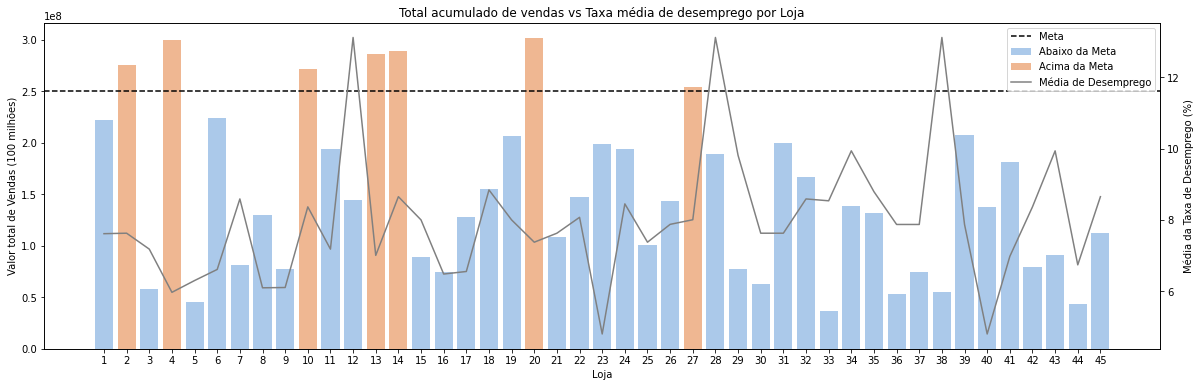

In [35]:
fig = plt.figure(figsize=(20,6))

ax1 = sns.barplot(x="Loja", 
            y="VendaSemanal",
            data = df_loja,
            hue="BateuMeta",
            palette = palette,
            dodge=False
            )

plt.axhline(250000000, color =  'black', linestyle = '--', label = 'Meta')
plt.ylabel('Valor total de Vendas (100 milhões)')

ax2 = ax1.twinx()
df_loja['Loja'] = df_loja['Loja'].apply(lambda x: x-1)
sns.lineplot(x='Loja', y='Desemprego', data=df_loja, ax=ax2, color = 'grey', label = 'Média de Desemprego', legend = False)
plt.ylabel('Média da Taxa de Desemprego (%)')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels)

plt.title('Total acumulado de vendas vs Taxa média de desemprego por Loja')

plt.show()

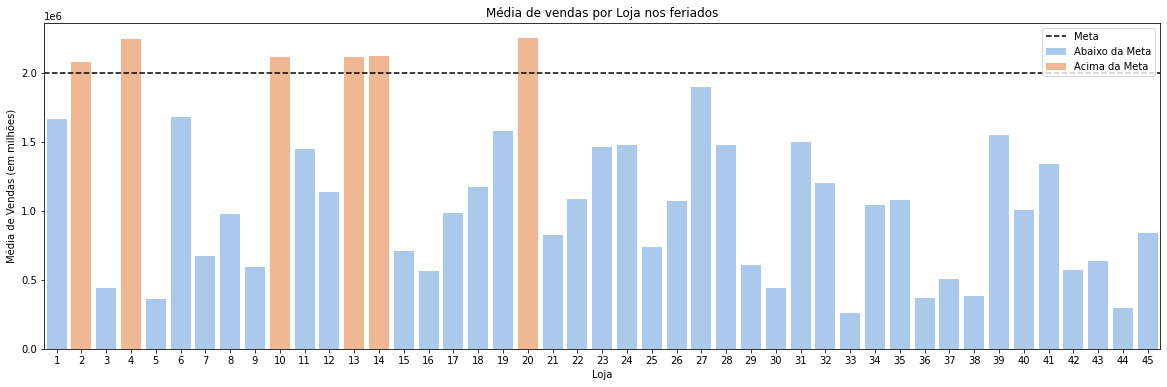

In [36]:
fig = plt.figure(figsize=(20,6))

ax1 = sns.barplot(x="Loja", 
            y="VendaSemanal",
            data = df_feriados,
            hue = "BateuMeta",
            palette = palette,
            dodge=False
            )

plt.axhline(2000000, color =  'black', linestyle = '--', label = 'Meta')

plt.ylabel('Média de Vendas (em milhões)')
plt.title('Média de vendas por Loja nos feriados')
ax1.legend()

plt.show()

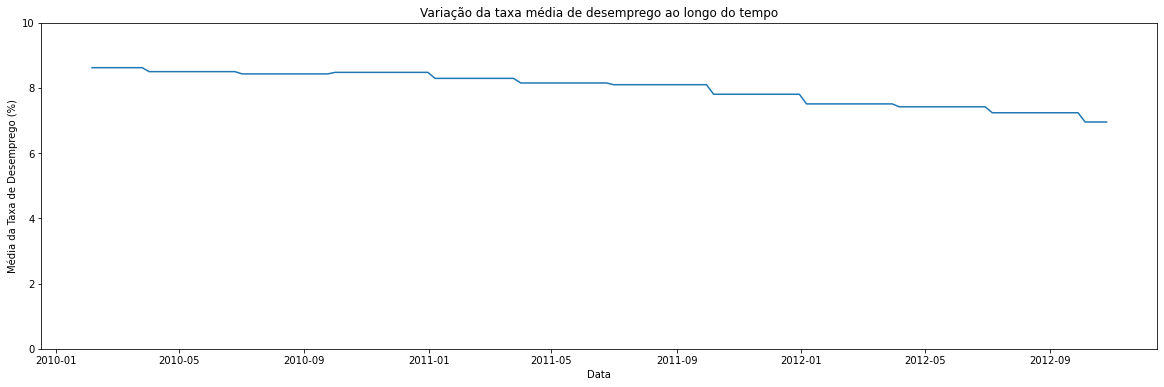

In [45]:
plt.figure(figsize=(20,6))

ax = sns.lineplot(x = 'Data', 
                  y = 'Desemprego', 
                  data = media_desemprego)

plt.title('Variação da taxa média de desemprego ao longo do tempo')
plt.ylabel('Média da Taxa de Desemprego (%)')

ax.set(ylim=(0, 10))
plt.show()

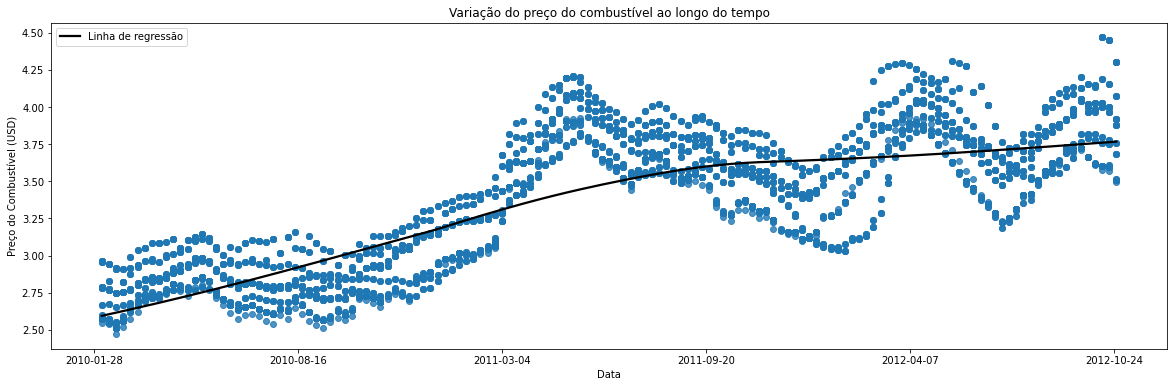

In [44]:
plt.figure(figsize=(20,6))
df_plot = df_wm.copy()
df_plot['Data'] = df_plot['Data'].apply(lambda date: date.toordinal())

ax = sns.regplot(x = 'Data', 
                 y = 'PrecoComb', 
                 data = df_plot, 
                 lowess = True, 
                 line_kws={"color": "black",'label': 'Linha de regressão'})

new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels)

plt.title('Variação do preço do combustível ao longo do tempo')
plt.ylabel('Preço do Combustível (USD)')

ax.legend(loc = 'upper left')

plt.show()

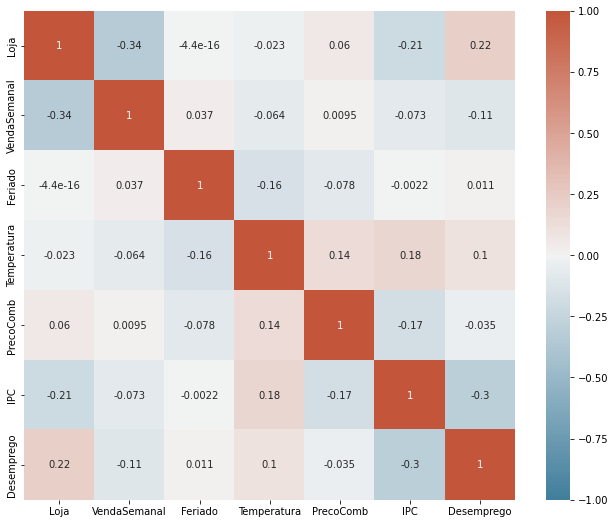

In [43]:
f = plt.figure(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

corr = sns.heatmap(data=df_wm.corr(), cmap=cmap, vmin = -1, annot=True)

plt.show()

A partir das observações visuais, podemos concluir:


* A **taxa média de desemprego** é relativamente baixa nas lojas com maiores vendas acumuladas, já as maiores taxas foram observadas nas lojas que venderam menos.
* As **lojas com mais vendas acumuladas**, também são as mesmas com as maiores **médias de vendas durante os feriados**.
* A **taxa de desemprego sofreu queda** constante de 2010 até 2019.
* O **preço de combustível sofreu muitas variações** ao longo do tempo e terminou em alta ao final de 2012.
* Em relação às **correlações com as Vendas Semanais**, todas são **muito fracas**, sendo a **mais negativa de -0,11 com a Taxa de Desemprego** e **mais positiva de 0,037 com Feriado**.



### Insights

In [50]:
df_lojas_sum = df_wm.groupby('Loja', as_index=False)[["VendaSemanal"]].sum().sort_values(['VendaSemanal'], ascending=False)
df_lojas_med = df_wm.groupby('Loja', as_index=False)[["VendaSemanal", "Desemprego", "PrecoComb"]].mean().sort_values(['VendaSemanal'], ascending=False)
df_lojas_max = df_wm.groupby('Loja', as_index=False)[["VendaSemanal", "Desemprego", "PrecoComb"]].max().sort_values(['VendaSemanal'], ascending=False)
df_lojas_min = df_wm.groupby('Loja', as_index=False)[["VendaSemanal", "Desemprego", "PrecoComb"]].min().sort_values(['VendaSemanal'], ascending=False)

In [76]:
pd.set_option('float_format', '{:.2f}'.format)
df_lojas_med.head(10)

,Loja,VendaSemanal,Desemprego,PrecoComb
19,20,2107676.87,7.37,3.42
3,4,2094712.96,5.96,3.22
13,14,2020978.40,8.65,3.42
12,13,2003620.31,7.00,3.29
1,2,1925751.34,7.62,3.22
9,10,1899424.57,8.36,3.58
26,27,1775216.20,8.00,3.58
5,6,1564728.19,6.61,3.22
0,1,1555264.40,7.61,3.22
38,39,1450668.13,7.87,3.22


#### Média de venda semanal, taxa de desemprego e preço de combustível

Dentre as cinco lojas com maior média de venda semanal:
* A loja com maior média semanal é a nº 20 a USD 2,108 milhões.
* A loja nº 4 tem a menor taxa de desemprego a 5,96%.
* Em conjunto com a loja nº 4, a loja nº 2 também tem a menor média de preço de combustível a USD 3,22.

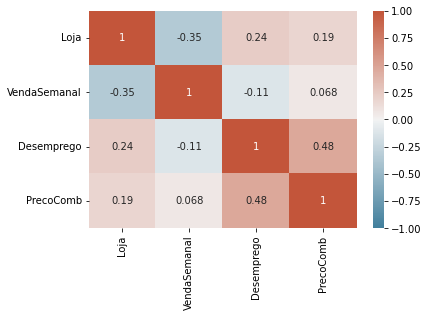

In [49]:
sns.heatmap(data=df_lojas_med.corr(), cmap=cmap, vmin = -1, annot=True)

Ao fazer a visualização de correlação das médias foi interessante perceber a forte correlação positiva entre a Taxa de Desemprego e Preço de Combustível em 0,48.

#### Lojas com maior venda acumulada

In [80]:
df_lojas_sum.head(10)

,Loja,VendaSemanal
19,20,301397792.46
3,4,299543953.38
13,14,288999911.34
12,13,286517703.80
1,2,275382440.98
9,10,271617713.89
26,27,253855916.88
5,6,223756130.64
0,1,222402808.85
38,39,207445542.47


A ordem das lojas com maior venda acumulada se manteve igual à de média de Vendas Semanais, sendo interessante notar a diferença de apenas USD 1,9 milhões entre a loja nº 20 para nº 4.

Já a diferença entre a loja nº 4 e nº 14 é superior a USD 10,5 milhões. 

#### Quantas semanas do ano ultrapassaram a média do período?

In [77]:
df_20 = df_wm[df_wm['Loja'] == 20].copy()
df_20["BateuMedia"] = df_20['VendaSemanal'].apply(lambda x: 1 if x > df_lojas_med['VendaSemanal'][20-1] else 0)
df_20_m = df_20.groupby("Loja", as_index=False)["BateuMedia"].sum()


df_04 = df_wm[df_wm['Loja'] == 4].copy()
df_04["BateuMedia"] = df_04['VendaSemanal'].apply(lambda x: 1 if x > df_lojas_med['VendaSemanal'][4-1] else 0)
df_04_m = df_04.groupby("Loja", as_index=False)["BateuMedia"].sum()

df_14 = df_wm[df_wm['Loja'] == 14].copy()
df_14["BateuMedia"] = df_14['VendaSemanal'].apply(lambda x: 1 if x > df_lojas_med['VendaSemanal'][14-1] else 0)
df_14_m = df_14.groupby("Loja", as_index=False)["BateuMedia"].sum()

df_13 = df_wm[df_wm['Loja'] == 13].copy()
df_13["BateuMedia"] = df_13['VendaSemanal'].apply(lambda x: 1 if x > df_lojas_med['VendaSemanal'][13-1] else 0)
df_13_m = df_13.groupby("Loja", as_index=False)["BateuMedia"].sum()

df_02 = df_wm[df_wm['Loja'] == 2].copy()
df_02["BateuMedia"] = df_02['VendaSemanal'].apply(lambda x: 1 if x > df_lojas_med['VendaSemanal'][2-1] else 0)
df_02_m = df_02.groupby("Loja", as_index=False)["BateuMedia"].sum()

df_10 = df_wm[df_wm['Loja'] == 10].copy()
df_10["BateuMedia"] = df_10['VendaSemanal'].apply(lambda x: 1 if x > df_lojas_med['VendaSemanal'][10-1] else 0)
df_10_m = df_10.groupby("Loja", as_index=False)["BateuMedia"].sum()

df_27 = df_wm[df_wm['Loja'] == 27].copy()
df_27["BateuMedia"] = df_27['VendaSemanal'].apply(lambda x: 1 if x > df_lojas_med['VendaSemanal'][27-1] else 0)
df_27_m = df_27.groupby("Loja", as_index=False)["BateuMedia"].sum()

df_06 = df_wm[df_wm['Loja'] == 6].copy()
df_06["BateuMedia"] = df_06['VendaSemanal'].apply(lambda x: 1 if x > df_lojas_med['VendaSemanal'][6-1] else 0)
df_06_m = df_06.groupby("Loja", as_index=False)["BateuMedia"].sum()

df_01 = df_wm[df_wm['Loja'] == 1].copy()
df_01["BateuMedia"] = df_01['VendaSemanal'].apply(lambda x: 1 if x > df_lojas_med['VendaSemanal'][1-1] else 0)
df_01_m = df_01.groupby("Loja", as_index=False)["BateuMedia"].sum()

df_39 = df_wm[df_wm['Loja'] == 39].copy()
df_39["BateuMedia"] = df_39['VendaSemanal'].apply(lambda x: 1 if x > df_lojas_med['VendaSemanal'][39-1] else 0)
df_39_m = df_39.groupby("Loja", as_index=False)["BateuMedia"].sum()

In [82]:
bateu_media = df_20_m.append([df_04_m, df_14_m, df_13_m, df_02_m, df_10_m, df_27_m, df_06_m, df_01_m, df_39_m], ignore_index=True).sort_values(['BateuMedia'], ascending=False)

bateu_media

,Loja,BateuMedia
2,14,66
1,4,62
9,39,61
6,27,59
7,6,56
8,1,56
4,2,53
0,20,52
3,13,52
5,10,47


As lojas que bateram média por mais semanas, dentre as 10 com maior venda acumudala, foram nº 14 e nº 4 com 66 e 62 respectivamente. 

A loja nº 20, que teve mais vendas acumuladas, superou a média de vendas em 52 semanas.

### Criação de Score